In [ ]:
#imports and such
import math
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt
#select display
%matplotlib inline

In [3]:
#bit that handles NSIDE; talk to Hy and Yizhou
#for now, magic number it
NSIDE = 32
Npixel = 12*(NSIDE**2)

In [4]:
#reads maps
PATH = "./"
#map_len = hp.readmap(PATH + "map_len.fits")
#map_tau = hp.readmap(PATH + "map_tau.fits")
#map_tsz = hp.readmap(PATH + "map_tsz.fits")
#map_ksz = hp.readmap(PATH + "map_ksz.fits")
#map_xry = hp.readmap(PATH + "map_xry.fits")
#map_Tew = hp.readmap(PATH + "map_Tew.fits")

In [5]:
#Mass surface density
#hp.mollview(map_len, coord = 'G', title = "Mass Surface Density [Msolar/steradian]")

In [7]:
#Thomson Opt. Depth
#hp.mollview(map_tau, coord = 'G', title = "Thomson Optical Depth")

In [ ]:
#Comp. Y Signal
#hp.mollview(map_tsz, coord = 'G', title = "Compton Y Signal [microKelvin]")

In [ ]:
#Doppler b Signal
#hp.mollview(map_ksz, coord = 'G', title = "Doppler b Signal [microKelvin]")

In [ ]:
#Bolometric Brightness
#hp.mollview(map_xry, coord = 'G', title = "Bolometric Surface Brightness [ergs/s/cm^2]")

In [ ]:
#Emission-weighted temp
#hp.mollview(map_Tew, coord = 'G', title = "Emission-Weighted Temperature [k]")

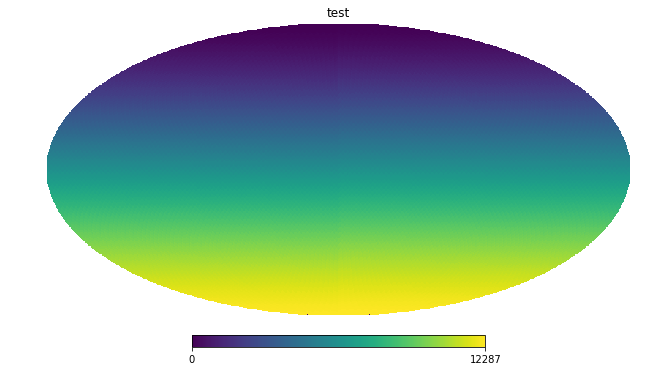

In [77]:
## Query test
import math
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt
#select display
%matplotlib inline

testvec = np.array([3.0,6.0, 8.0])
testrad = math.pi-.03
testarray = np.zeros(12*(32**2),dtype = int)
hp.query_disc(32, testvec, testrad, buff=testarray)
hp.write_map("test5.fits", testarray)
hp.mollview(testarray, title = "test")


NSIDE = 32
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


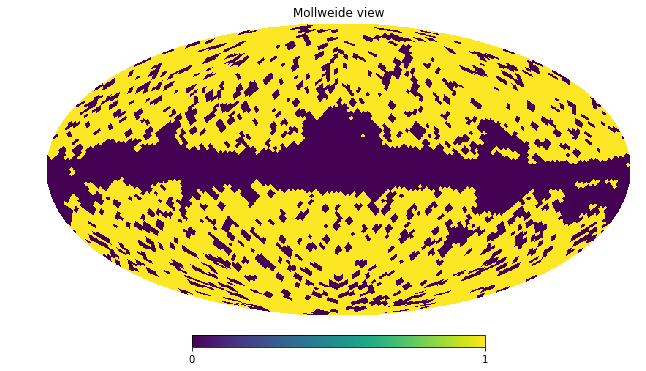

In [91]:
## Query test
import math
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt
#select display
%matplotlib inline

testmap = hp.read_map("/home/dez/.conda/pkgs/healpy-1.12.0-py36_1/lib/python3.6/site-packages/healpy/test/data/wmap_temperature_analysis_mask_r9_7yr_v4_udgraded32.fits")
hp.mollview(testmap)

query polygon results:
[  0   1   2   3   4   5  11  12  13  14  23  24  25  26  39  40  41  42
  43  56  57  58  71  72  73  74  75  88  89  90 103 104 105 106 107 120
 121 122 135 136 137 138 139 152 153 154 168 169 170 181]


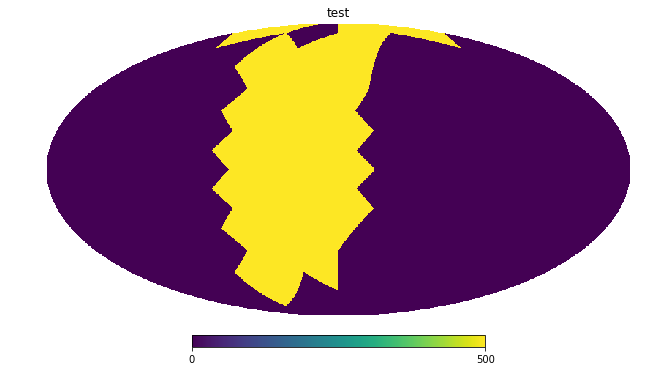

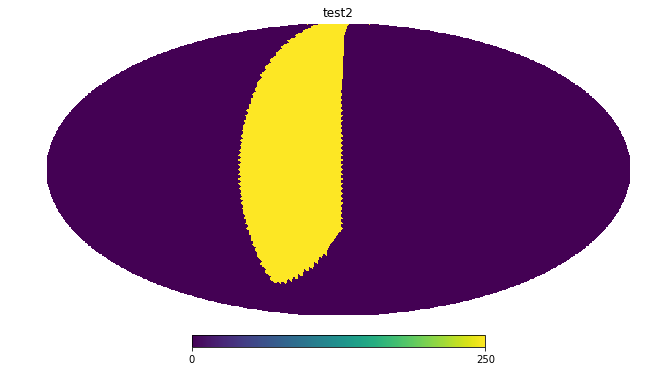

In [41]:
## Query test
import math
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt
#select display
%matplotlib inline

def all_nonzero(polygon):
    count = 0
    nonzeros = []
    while(count < polygon.shape[0]):
        if(polygon[count] != 0):
            nonzeros.append(polygon[count])
        count += 1
    return nonzeros

def shape2map(polygon, nside, signal):
    outmap = np.zeros(12*(nside**2), dtype = int)
    locs = all_nonzero(polygon)
    for x in range(0,len(locs)):
        outmap[locs[x]] = signal
    return outmap
        
testvec = np.array([hp.ang2vec(0, ),
                    hp.ang2vec(2*math.pi/3, 0),
                    hp.ang2vec(5*math.pi/6, math.pi/3)])
testarray = np.zeros(12*(4**2),dtype = int)
testarray2 = np.zeros(12*(32**2),dtype = int)

print("query polygon results:")
print(hp.query_polygon(4, testvec, buff=testarray, inclusive = True))
hp.query_polygon(32, testvec, buff=testarray2, inclusive = True)
#hp.write_map("testpolygon.fits", testarray)
hp.mollview(shape2map(testarray, 4, 500), title = "test")
hp.mollview(shape2map(testarray2, 32, 250), title = "test2")

NSIDE = 32
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
NSIDE = 32
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


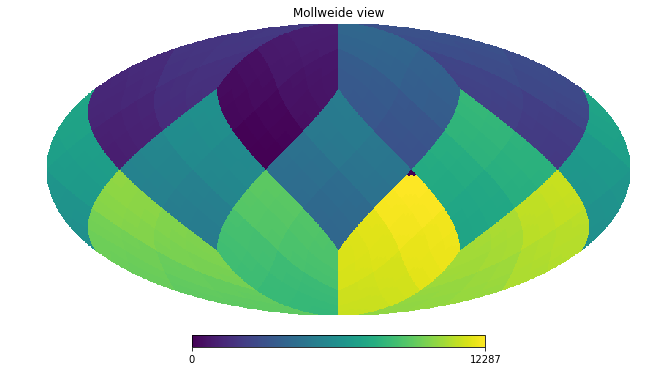

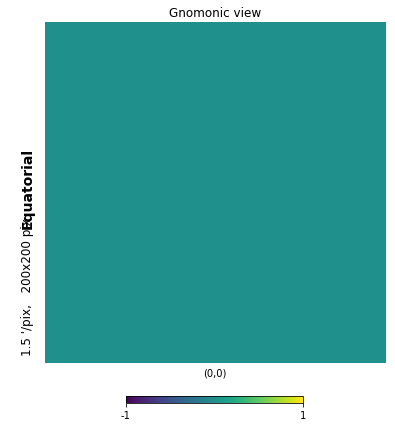

In [2]:
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt
%matplotlib inline
testmap = hp.read_map("test5.fits")
hp.mollview(testmap, nest = True)
testpolygon = hp.read_map("testpolygon.fits")
hp.gnomview(testpolygon, coord = ['G','C'])